## 验证数据集
- 在使用测试数据集进行验证时,我们可能会对特定测试数据集进行过拟合
- 引入验证数据集,作为调整超参数使用的数据集,测试数据作为衡量模型的最终数据集

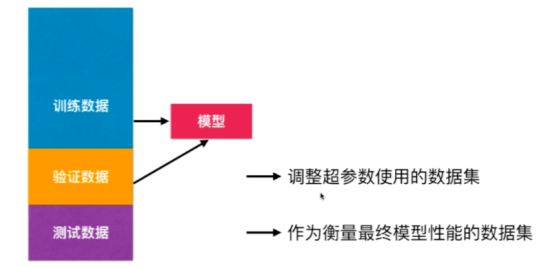

## 交叉验证
1. 将训练数据集分成3份
2. 选取其中一份作为验证数据集,其他两份作为测试数据集
3. 进行交叉验证,对k个模型的结果均值进行调参

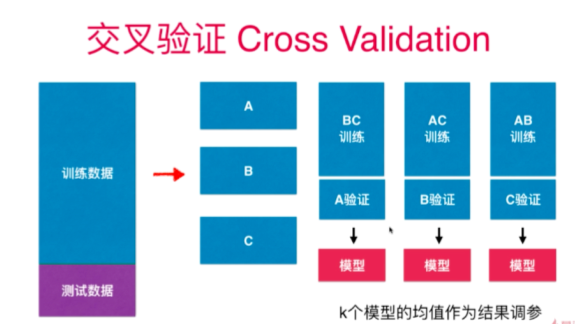

In [1]:
import numpy as np
from sklearn import datasets

In [4]:
digits = datasets.load_digits()
X = digits.data
y= digits.target

### 测试 train test spilit 

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

best_score = 0
best_k,best_p = 0,0

for k in range(2,11):
    for p in range(1,5):
        #在实例化的时候,传入超参数
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        knn_clf.fit(X_train,y_train)
        score = knn_clf.score(X_test,y_test)
        if score > best_score:
            best_k,best_p,best_score = k,p,score
            
print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

Best K = 3
Best P = 4
Best Score = 0.986091794159


### 进行交叉验证

In [13]:
from sklearn.model_selection import cross_val_score
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf,X_train,y_train)

array([ 0.98895028,  0.97777778,  0.96629213])

In [14]:
best_score = 0
best_k,best_p = 0,0

for k in range(2,11):
    for p in range(1,5):
        #在实例化的时候,传入超参数
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        scores = cross_val_score(knn_clf,X_train,y_train)
        score =np.mean(scores)
        if score > best_score:
            best_k,best_p,best_score = k,p,score
            
print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

Best K = 2
Best P = 2
Best Score = 0.982359987401


In [16]:
best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=2, p=2)
best_knn_clf.fit(X_train,y_train)
best_knn_clf.score(X_test,y_test)

0.98052851182197498

此刻进行score的数据是测试集,在之前超参数拟合中,并没有使用到测试集数据.所以测试集值得相信.

### 回顾网格搜索

In [22]:
from sklearn.model_selection import GridSearchCV

#将要搜索的超参数,list,list中为一个dict
param_grid = [
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range (2,11) ],
        'p':[i for i in range (1,6)]
    }
]

#注意GridSearchCV传入的数据,第一个传入算法实例,第二个传入 超参数
grid_search = GridSearchCV(knn_clf,param_grid,verbose= 1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=4,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [23]:
grid_search.best_score_

0.98237476808905377

In [24]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [25]:
knn_best_clf = grid_search.best_estimator_

In [26]:
knn_best_clf.score(X_test,y_test)

0.98052851182197498

### 调整交叉验证的分类个数(folds)

In [28]:
cross_val_score(knn_clf,X_train,y_train,cv =5)

array([ 0.99543379,  0.96803653,  0.98148148,  0.97196262,  0.97619048])

In [30]:
grid_search = GridSearchCV(knn_clf,param_grid,verbose= 1,cv =5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  2.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=4,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)